In [1]:
# TODO clean and document code
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob  
from PIL import Image   
import random

2024-11-02 21:51:29.973920: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-02 21:51:29.974259: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 21:51:29.976179: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 21:51:29.981504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730580689.990253   17810 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730580689.99

In [2]:
tf.__version__

'2.18.0'

In [ ]:
# download the DIV2K dataset
# no need to repeat this process, uncomment if you don't have the data
"""
lr_dataset = f'DIV2K_train_LR_bicubic_X4.zip'
lr_datset_url = f'http://data.vision.ee.ethz.ch/cvl/DIV2K/{lr_dataset}'

hr_dataset = f'DIV2K_train_HR.zip'
hr_datset_url = f'http://data.vision.ee.ethz.ch/cvl/DIV2K/{hr_dataset}'

download_dir = './data'
download_dir = os.path.abspath(download_dir)

tf.keras.utils.get_file(lr_dataset, lr_datset_url, 
                        cache_subdir=download_dir, 
                        extract=True)
tf.keras.utils.get_file(hr_dataset, hr_datset_url, 
                        cache_subdir=download_dir, 
                        extract=True)
"""

246914039/246914039 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
3530603713/3530603713 ━━━━━━━━━━━━━━━━━━━━ 267s 0us/step


'/home/ansamz/Documents/github/Super_Resolution/data/DIV2K_train_HR_extracted'

In [ ]:
# download validation dataset
"""
val_lr_dataset = f'DIV2K_valid_LR_bicubic_X4.zip'
val_lr_datset_url = f'http://data.vision.ee.ethz.ch/cvl/DIV2K/{val_lr_dataset}'

val_hr_dataset = f'DIV2K_valid_HR.zip'
val_hr_datset_url = f'http://data.vision.ee.ethz.ch/cvl/DIV2K/{val_hr_dataset}'

download_dir = './data'
download_dir = os.path.abspath(download_dir)

tf.keras.utils.get_file(val_lr_dataset, val_lr_datset_url, 
                        cache_subdir=download_dir, 
                        extract=True)
tf.keras.utils.get_file(val_hr_dataset, val_hr_datset_url, 
                        cache_subdir=download_dir, 
                        extract=True)
"""

31505881/31505881 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
448993893/448993893 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


'/home/ansamz/Documents/github/Super_Resolution/data/DIV2K_valid_HR_extracted'

## Images inspection

In [2]:
def display_image_pair(lr_path, hr_path):
    lr_img = Image.open(lr_path)
    hr_img = Image.open(hr_path)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    ax1.imshow(lr_img)
    ax1.set_title('Low Resolution')
    ax1.axis('off')
    
    ax2.imshow(hr_img)
    ax2.set_title('High Resolution')
    ax2.axis('off')
    
    plt.show()

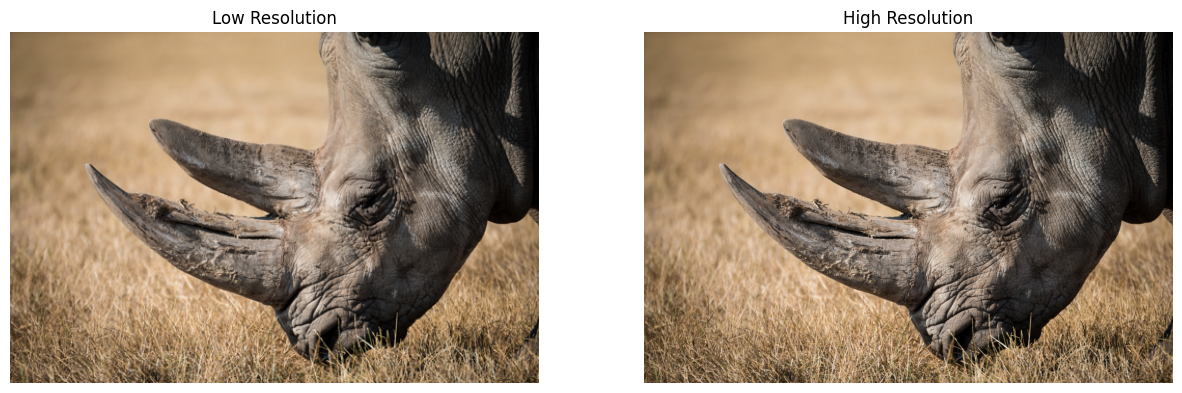

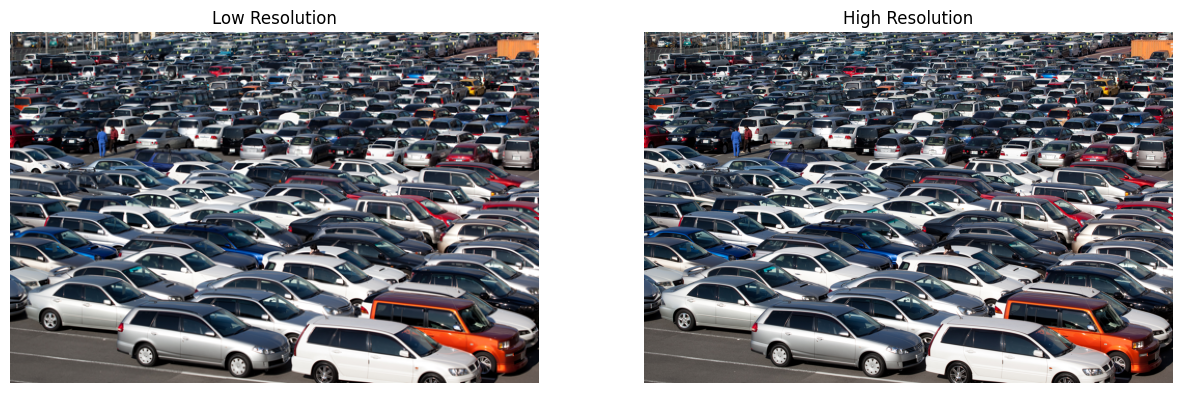

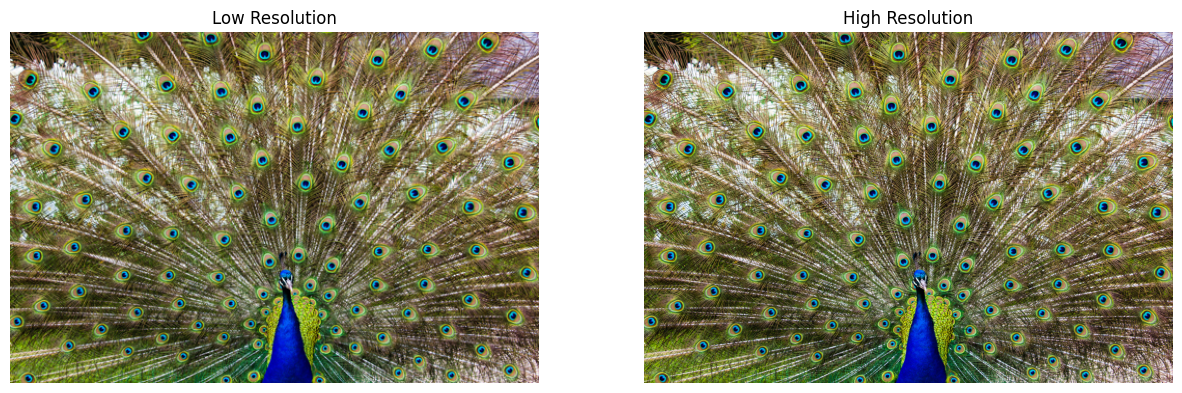

In [6]:
lr_dir = './data/DIV2K_train_LR_bicubic_X4_extracted/DIV2K_train_LR_bicubic/X4'
hr_dir = './data/DIV2K_train_HR_extracted/DIV2K_train_HR'

lr_files = sorted(glob(os.path.join(lr_dir, '*.png')))
hr_files = sorted(glob(os.path.join(hr_dir, '*.png')))

num_samples = 3
for _ in range(num_samples):
    idx = random.randint(0, len(lr_files) - 1)
    display_image_pair(lr_files[idx], hr_files[idx])

In [4]:
# shapes
lr_img = Image.open(lr_files[0])
hr_img = Image.open(hr_files[0])
print(f"Low Resolution Image Shape: {lr_img.size}")
print(f"High Resolution Image Shape: {hr_img.size}")

Low Resolution Image Shape: (510, 351)
High Resolution Image Shape: (2040, 1404)
